IMPORT

Source code ini merupakan implementasi machine learning menggunakan Python dengan beberapa library utama seperti pandas, seaborn, matplotlib, dan scikit-learn (sklearn).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LOAD DATA

In [ ]:
data = pd.read_csv("Student Mental health.csv")
data

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

code di bawah digunakan untuk mengecek nilai null pada setiap kolom pada dataset

In [ ]:
data.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

code dibawah ini digunakan untuk menghapus baris yang duplikat di datasetnya

In [ ]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

code dibawah digunakan untuk menghapus kolom-kolom dari Dataset yang hanya memiliki satu nilai unik. Langkah ini dilakukan untuk menghilangkan kolom-kolom yang tidak memberikan variasi informasi yang signifikan, yang mungkin tidak berguna dalam analisis atau pemodelan data.

In [ ]:
data = data.loc[:,data.apply(pd.Series.nunique) != 1]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

Kode dibawah melakukan iterasi melalui setiap kolom dalam Dataset untuk mencari kolom-kolom yang memiliki tipe data object (biasanya ini adalah kolom dengan data kategori atau string) dan memiliki 50 nilai unik atau kurang. Tujuan dari kode ini adalah untuk mengidentifikasi kolom-kolom kategorikal dan mencetak nilai unik dari setiap kolom tersebut.

In [ ]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

Choose your gender : ['Female' 'Male']
What is your course? : ['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting ' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin ' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences ' 'Biotechnology'
 'Communication ' 'Diploma Nursing' 'Pendidikan Islam ' 'Radiography'
 'psychology' 'Fiqh fatwa ' 'DIPLOMA TESL' 'Koe' 'Fiqh'
 'Islamic Education' 'Nursing ' 'Pendidikan Islam']
Your current year of Study : ['year 1' 'year 2' 'Year 1' 'year 3' 'year 4' 'Year 2' 'Year 3']
What is your CGPA? : ['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']
Marital status : ['No' 'Yes']
Do you have Depression? : ['Yes' 'No']
Do you have Anxiety? : ['No' 'Yes']
Do you have Panic attack? : ['Yes' 'No']
Did

In [ ]:
data.drop( ['Timestamp'] , axis = 1 ,inplace = True)

Perintah code di atas digunakan untuk menghapus kolom dengan nama 'Timestamp' dari Dataset. Setelah dijalankan, kolom 'Timestamp' akan dihapus dari Dataset lalu Dataset akan dimodifikasi dan tidak akan lagi memiliki kolom 'Timestamp'.

In [ ]:
data.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
nama = {
    'Choose your gender' : 'Kelamin',
    'Age' : 'Umur',
    'What is your course?' : 'Jurusan',
    'Do you have a family history of mental illness' : 'Keluarga',
    'Your current year of Study' : 'Tahun',
    'Marital status' : 'Status',
    'What is your CGPA?' : 'IPK',
    'Do you have Depression?' : 'Depresi',
    'Do you have Anxiety?' : 'Kecemasan',
    'Do you have Panic attack?' : 'Panic attack',
    'Did you seek any specialist for a treatment?' : 'Konsultasi',
}
data.rename(columns=nama,inplace=True)
data.head()

,Kelamin,Umur,Jurusan,Tahun,IPK,Status,Depresi,Kecemasan,Panic attack,Konsultasi
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
data['IPK'].value_counts()

IPK
3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         4
2.00 - 2.49      2
3.50 - 4.00      1
Name: count, dtype: int64

In [ ]:
SEX_mapping = {
    'Female': 0,'Male': 1}
data['Kelamin'] = data['Kelamin'].map(SEX_mapping)

Tahun_mapping = {
    'year 1': 0, 'Year 1' : 0,
    'year 2': 1, 'Year 2' : 1,
    'year 3': 2, 'Year 3' : 2,
    'year 4': 3}
data['Tahun'] = data['Tahun'].map(Tahun_mapping)

Status_mapping = {
    'No': 0, 'Yes': 1}
data['Status'] = data['Status'].map(Status_mapping)

Depresi_mapping = {
    'No': 0, 'Yes': 1}
data['Depresi'] = data['Depresi'].map(Depresi_mapping)

Kecemasan_mapping = {
    'No': 0, 'Yes': 1}
data['Kecemasan'] = data['Kecemasan'].map(Kecemasan_mapping)

Panic_mapping = {
    'No': 0, 'Yes': 1}
data['Panic attack'] = data['Panic attack'].map(Panic_mapping)

Konsultasi_mapping = {
    'No': 0, 'Yes': 1}
data['Konsultasi'] = data['Konsultasi'].map(Konsultasi_mapping)

IPK_mapping = {
    '0 - 1.99': 0,
    '2.00 - 2.49': 1,
    '2.50 - 2.99': 2,
    '3.00 - 3.49': 3,
    '3.50 - 4.00 ': 4,  '3.50 - 4.00' :4
    }
data['IPK'] = data['IPK'].map(IPK_mapping)

Code diatas digunakan untuk melakukan pemetaan (mapping) nilai-nilai kategori dalam beberapa kolom tertentu dari Dataset menjadi nilai numerik. Ini adalah langkah yang umum dilakukan dalam analisis data dan machine learning untuk mengubah data kategorikal menjadi bentuk yang bisa diolah lebih lanjut oleh model-machine learning atau algoritma yang membutuhkan input numerik.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Kelamin       101 non-null    int64  
 1   Umur          100 non-null    float64
 2   Jurusan       101 non-null    object 
 3   Tahun         101 non-null    int64  
 4   IPK           101 non-null    int64  
 5   Status        101 non-null    int64  
 6   Depresi       101 non-null    int64  
 7   Kecemasan     101 non-null    int64  
 8   Panic attack  101 non-null    int64  
 9   Konsultasi    101 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 8.0+ KB


In [ ]:
data.drop( ['Jurusan'] , axis = 1 ,inplace = True)

Code ini digunakan untuk mengapus jurusan yang ada pada data

In [ ]:
data['IPK'].value_counts()

IPK
4    48
3    43
2     4
0     4
1     2
Name: count, dtype: int64

In [ ]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Kelamin       101 non-null    int64  
 1   Umur          100 non-null    float64
 2   Tahun         101 non-null    int64  
 3   IPK           101 non-null    int64  
 4   Status        101 non-null    int64  
 5   Depresi       101 non-null    int64  
 6   Kecemasan     101 non-null    int64  
 7   Panic attack  101 non-null    int64  
 8   Konsultasi    101 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 7.2 KB


Kode ini digunakan untuk membuat plot bar dari jumlah nilai dalam kolom 'Depresi' dalam DataFrame data menggunakan library seaborn (sns) dan matplotlib.pyplot (plt).

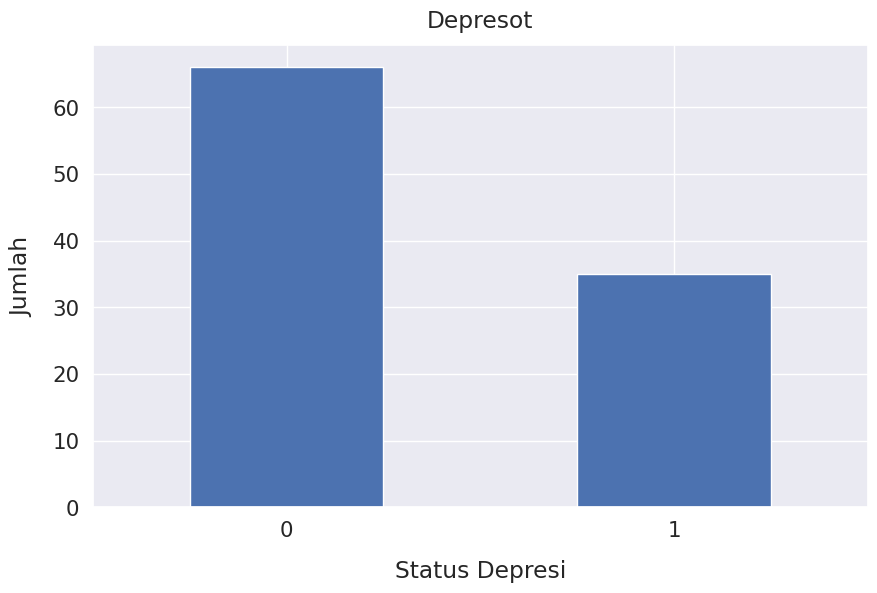

In [ ]:
sns.set(font_scale=1.4)
data['Depresi'].value_counts().plot(kind='bar', figsize=(10, 6), rot=0)
plt.xlabel("Status Depresi", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Depresot", y=1.02);

Code dibawah digunakan untuk membuat plot countplot untuk kolom umur dengan mengelompokkan berdasarkan data yang mengalami depresi

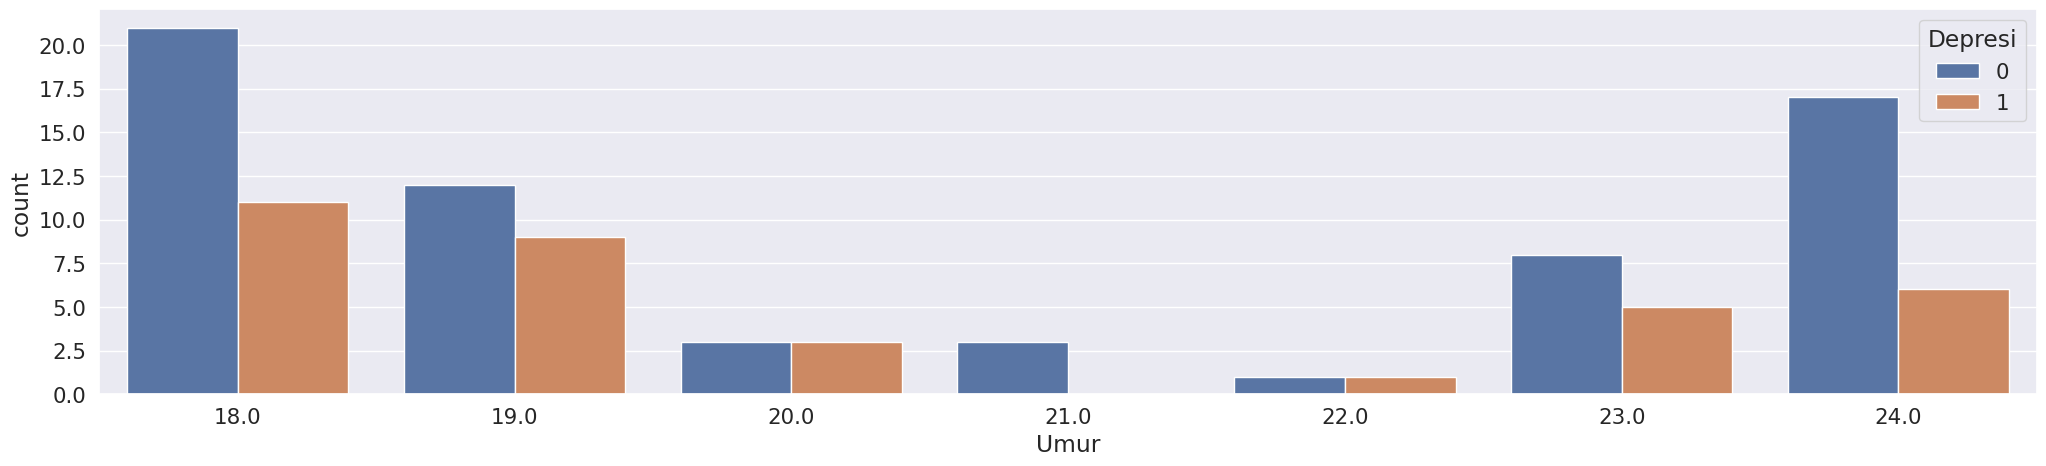

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=data['Umur'],order=data['Umur'].value_counts().index.sort_values(ascending=True),hue=data['Depresi'])
plt.show()

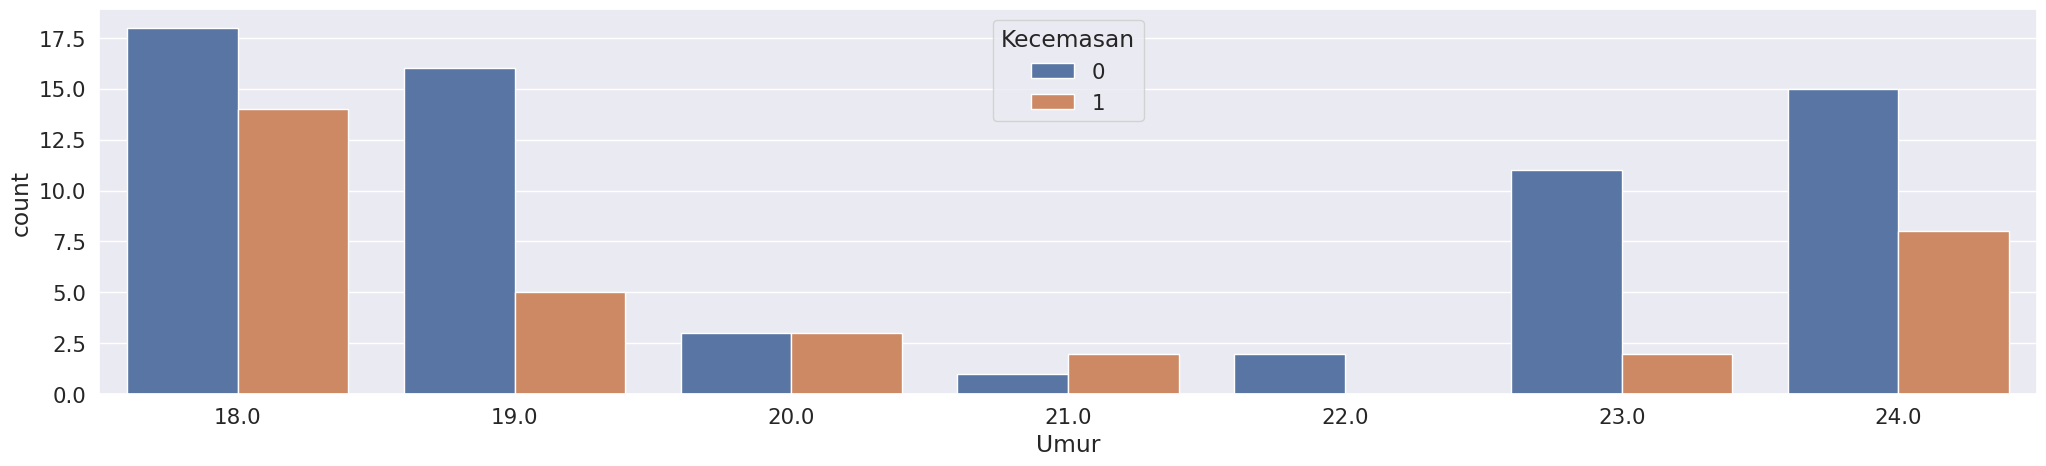

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=data['Umur'],order=data['Umur'].value_counts().index.sort_values(ascending=True),hue=data['Kecemasan'])
plt.show()

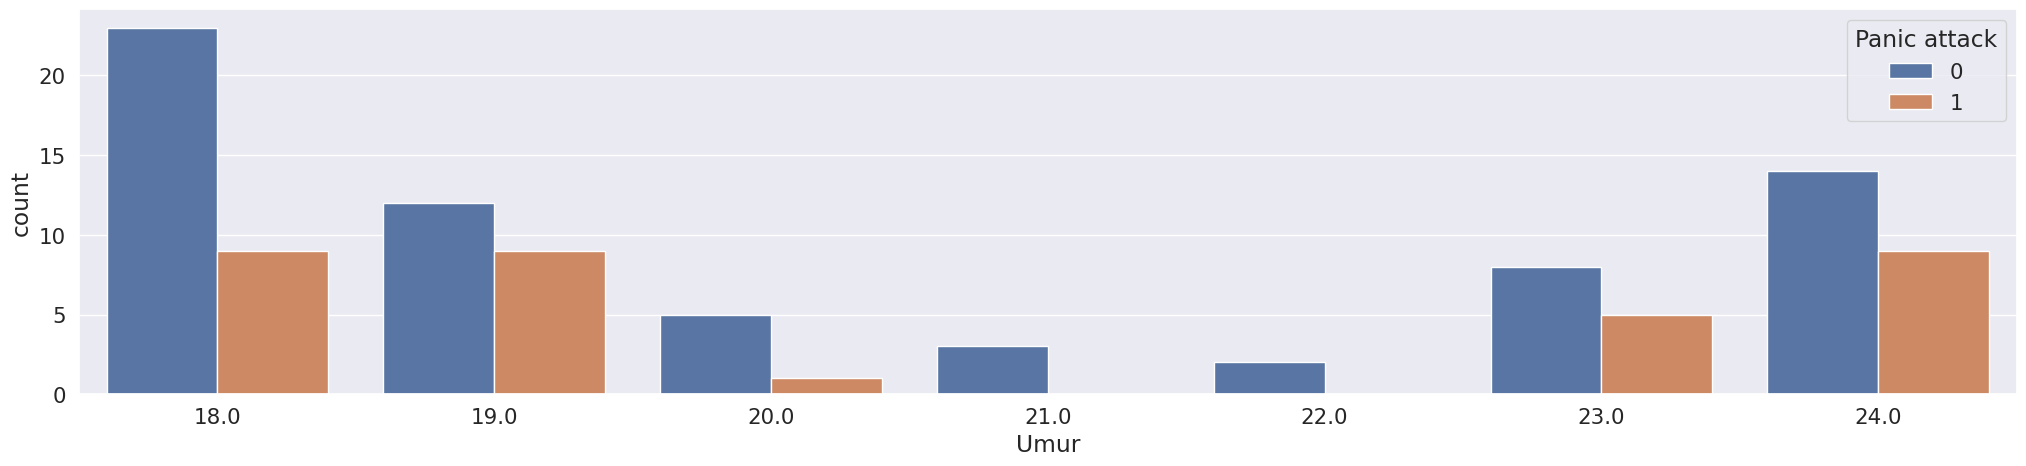

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=data['Umur'],order=data['Umur'].value_counts().index.sort_values(ascending=True),hue=data['Panic attack'])
plt.show()

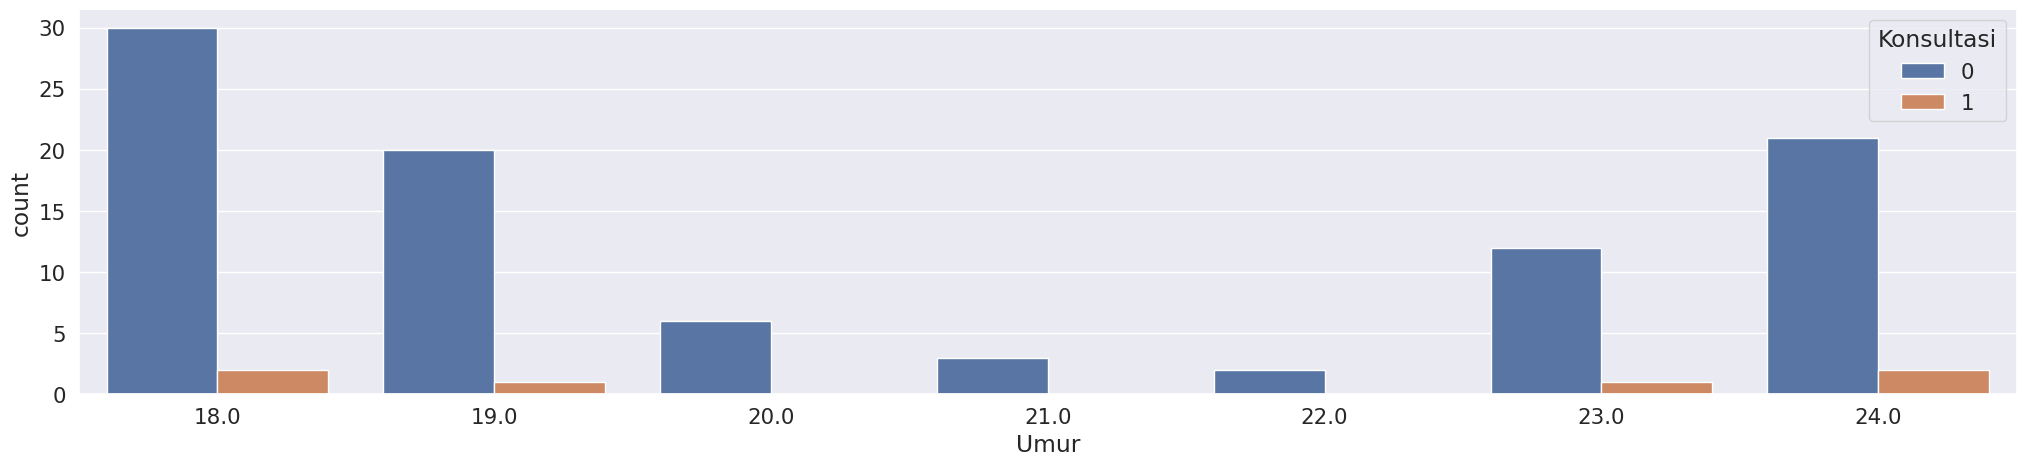

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=data['Umur'],order=data['Umur'].value_counts().index.sort_values(ascending=True),hue=data['Konsultasi'])
plt.show()

Kode ini bertujuan untuk mengisi nilai yang hilang (missing values) dalam kolom 'Umur' dari Dataset dengan nilai rata-rata dari kolom tersebut.

In [ ]:
data['Umur'].fillna(data['Umur'].mean(), inplace=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Kelamin       101 non-null    int64  
 1   Umur          101 non-null    float64
 2   Tahun         101 non-null    int64  
 3   IPK           101 non-null    int64  
 4   Status        101 non-null    int64  
 5   Depresi       101 non-null    int64  
 6   Kecemasan     101 non-null    int64  
 7   Panic attack  101 non-null    int64  
 8   Konsultasi    101 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 7.2 KB


,Kelamin,Umur,Tahun,IPK,Status,Depresi,Kecemasan,Panic attack,Konsultasi
0,0,18.0,0,3,0,1,0,1,0
1,1,21.0,1,3,0,0,1,0,0
2,1,19.0,0,3,0,1,1,1,0
3,0,22.0,2,3,1,1,0,0,0
4,1,23.0,3,3,0,0,0,0,0


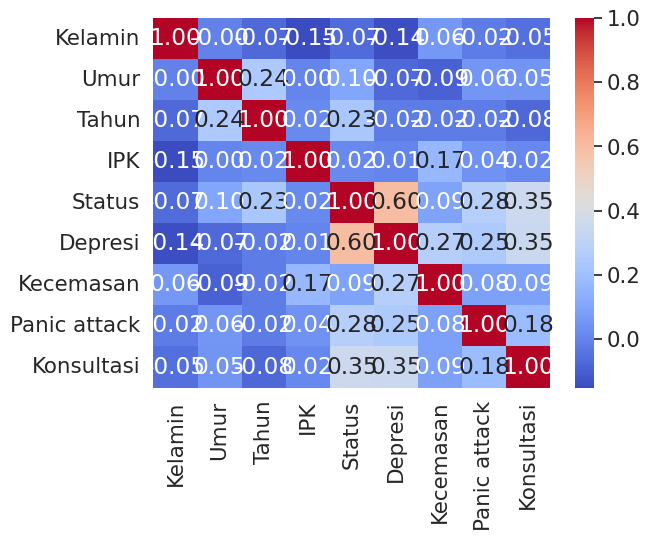

<Figure size 1500x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")

# Set the figure size
plt.figure(figsize=(15, 6))

# Show the heatmap
plt.show()


MODELING


kode dibawah untuk menghilangkan kolom depresi pada dataset

In [ ]:
X = data.drop('Depresi', axis=1)
y = data['Depresi']

X.head()

,Kelamin,Umur,Tahun,IPK,Status,Kecemasan,Panic attack,Konsultasi
0,0,18.0,0,3,0,0,1,0
1,1,21.0,1,3,0,1,0,0
2,1,19.0,0,3,0,1,1,0
3,0,22.0,2,3,1,0,0,0
4,1,23.0,3,3,0,0,0,0


kode ini digunakan untuk penskalaan fitur menggunakan StandardScaler, untuk memastikan bahwa semua fitur yang ada pada data X memiliki skala yang serupa

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Kode dibawah ini bertujuan untuk membuat DataFrame baru dari hasil transformasi menggunakan StandardScaler pada data X, dan menambahkan nama kolom-kolom dari DataFrame ke hasil_Scaler.

In [ ]:
hasil_Scaler = pd.DataFrame(X, columns=data.drop('Depresi', axis=1).columns)
hasil_Scaler.head()

,Kelamin,Umur,Tahun,IPK,Status,Kecemasan,Panic attack,Konsultasi
0,-0.588784,-1.023694,-0.980490,-0.2966,-0.433861,-0.712364,1.435481,-0.251312
1,1.698416,0.190172,0.030015,-0.2966,-0.433861,1.403776,-0.696631,-0.251312
2,1.698416,-0.619072,-0.980490,-0.2966,-0.433861,1.403776,1.435481,-0.251312
3,-0.588784,0.594795,1.040520,-0.2966,2.304886,-0.712364,-0.696631,-0.251312
4,1.698416,0.999417,2.051026,-0.2966,-0.433861,-0.712364,-0.696631,-0.251312


In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Depresi, dtype: int64

Kode yang Anda berikan digunakan untuk membagi data menjadi data latih (train) dan data uji (test) menggunakan train_test_split dari sklearn.model_selection

In [ ]:
x_train , x_test ,  y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

Kode ini mencetak dimensi atau bentuk (shape) dari masing-masing variabel setelah proses pemisahan menggunakan train_test_split.

In [ ]:
print("bagian x train" , x_train.shape)
print("bagian x test" , x_test.shape)
print("bagian y train ", y_train.shape)
print("bagian y test",y_test.shape )

bagian x train (80, 8)
bagian x test (21, 8)
bagian y train  (80,)
bagian y test (21,)


In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

Kode ini digunakan untuk melakukan prediksi menggunakan model yang telah dilatih (model) pada data uji (x_test).

In [ ]:
y_pred = model.predict(x_test)

EVALUASI

Kode ini untuk menghitung beberapa metrik evaluasi kinerja model (misalnya, akurasi, presisi, recall, dan matriks kebingungan) setelah melakukan prediksi menggunakan model Naive Bayes pada data uji.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8571428571428571
Precision: 1.0
Recall: 0.5
Confusion Matrix:
 [[15  0]
 [ 3  3]]


Kode classification_report(y_test, y_pred) digunakan untuk menghasilkan laporan klasifikasi yang lengkap yang mencakup beberapa metrik evaluasi (precision, recall, f1-score, dan support) untuk setiap kelas target, serta nilai rata-rata dari metrik-metrik tersebut.

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.50      0.67         6

    accuracy                           0.86        21
   macro avg       0.92      0.75      0.79        21
weighted avg       0.88      0.86      0.84        21



<Axes: >

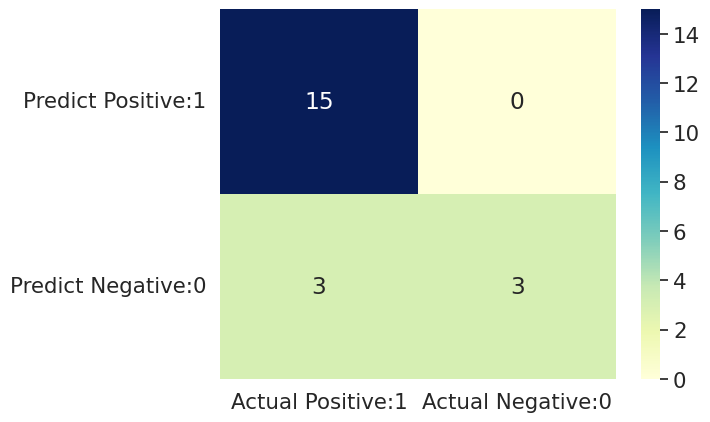

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=confusion, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

TESTING

In [ ]:
testing ={
    'SEX' : [1,0],
    'Umur' : [21,25],
    'Tahun' : [3 , 2],
    'IPK' : [1,4],
    'Status' : [1,1],
    'Kecemasan' : [1,0],
    'Panic attack' : [1,0],
    'Konsultasi' : [1,0]
}
testing = pd.DataFrame(testing)
testing.head()

,SEX,Umur,Tahun,IPK,Status,Kecemasan,Panic attack,Konsultasi
0,1,21,3,1,1,1,1,1
1,0,25,2,4,1,0,0,0


Kode ini menggambarkan penggunaan StandardScaler untuk melakukan penskalaan fitur pada data testing.

In [ ]:
scaler = StandardScaler()
testing = scaler.fit_transform(testing)
print(testing)

[[ 1. -1.  1. -1.  0.  1.  1.  1.]
 [-1.  1. -1.  1.  0. -1. -1. -1.]]


Kode y_pred_test = model.predict(testing) digunakan untuk melakukan prediksi menggunakan model yang telah dilatih (model) pada data testing yang telah di-scala.

In [ ]:
y_pred_test = model.predict(testing)
print(y_pred_test)

[1 1]


In [ ]:
print(" Hasil prediksinya adalah ")
for i in y_pred_test:
    if i == 1:
        print("Depresi")
    else:
        print("Tidak Depresi")

 Hasil prediksinya adalah 
Depresi
Depresi
